# Cancer death prediction

## Data obtained from https://www.kaggle.com/c/mubravo/data

### Goal is to predict the outcome of a patient given certain features

#### No information on the features were given

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_to_students.csv')

In [3]:
df.head()

,Patient,age,eventdeath,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
0,s157,45,0,7.874059,0,0,0,1,30,1,1,1,1,0.352512
1,s340,43,1,3.121150,1,0,0,1,22,1,2,1,1,0.425800
2,s292,48,0,8.366872,0,0,0,7,10,0,1,1,1,0.054635
3,s355,50,0,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
4,s161,46,1,8.128679,1,0,1,2,40,9,1,2,1,-0.147207


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,217.0,43.834101,5.575254,26.000000,40.000000,44.000000,48.000000,53.000000
eventdeath,217.0,0.271889,0.445962,0.000000,0.000000,0.000000,1.000000,1.000000
timerecurrence,217.0,7.327901,3.994658,0.271047,4.892539,6.995209,9.998631,18.080767
chemo,217.0,0.373272,0.484792,0.000000,0.000000,0.000000,1.000000,1.000000
hormonal,217.0,0.119816,0.325497,0.000000,0.000000,0.000000,0.000000,1.000000
amputation,217.0,0.414747,0.493817,0.000000,0.000000,0.000000,1.000000,1.000000
histtype,217.0,1.129032,0.602414,1.000000,1.000000,1.000000,1.000000,7.000000
diam,217.0,22.161290,8.578978,2.000000,15.000000,20.000000,28.000000,50.000000
posnodes,217.0,1.225806,2.006858,0.000000,0.000000,0.000000,2.000000,13.000000
grade,217.0,2.105991,0.795130,1.000000,1.000000,2.000000,3.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         217 non-null    object 
 1   age             217 non-null    int64  
 2   eventdeath      217 non-null    int64  
 3   timerecurrence  217 non-null    float64
 4   chemo           217 non-null    int64  
 5   hormonal        217 non-null    int64  
 6   amputation      217 non-null    int64  
 7   histtype        217 non-null    int64  
 8   diam            217 non-null    int64  
 9   posnodes        217 non-null    int64  
 10  grade           217 non-null    int64  
 11  angioinv        217 non-null    int64  
 12  lymphinfil      217 non-null    int64  
 13  esr1            217 non-null    float64
dtypes: float64(2), int64(11), object(1)
memory usage: 23.9+ KB


# Basic EDA

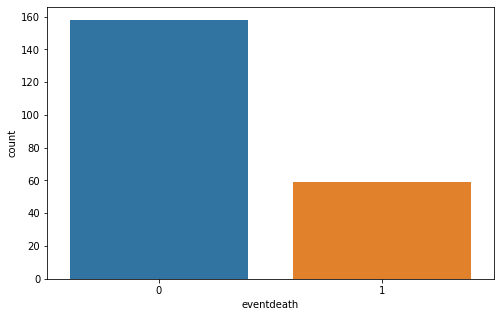

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='eventdeath');

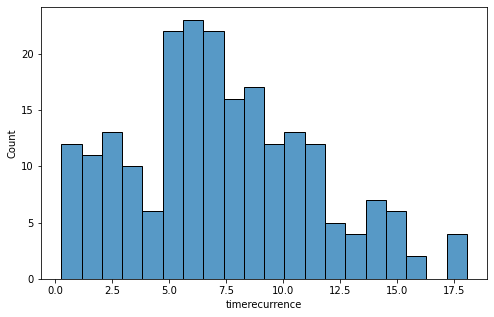

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='timerecurrence',bins=20);

<AxesSubplot:xlabel='age', ylabel='diam'>

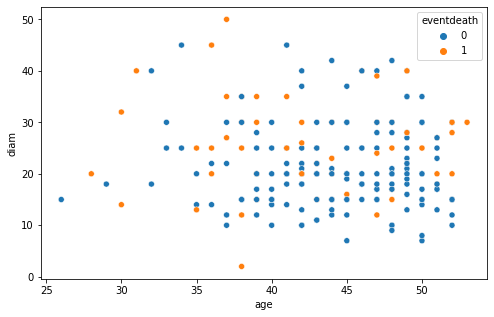

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='age',y='diam',hue='eventdeath')

<AxesSubplot:>

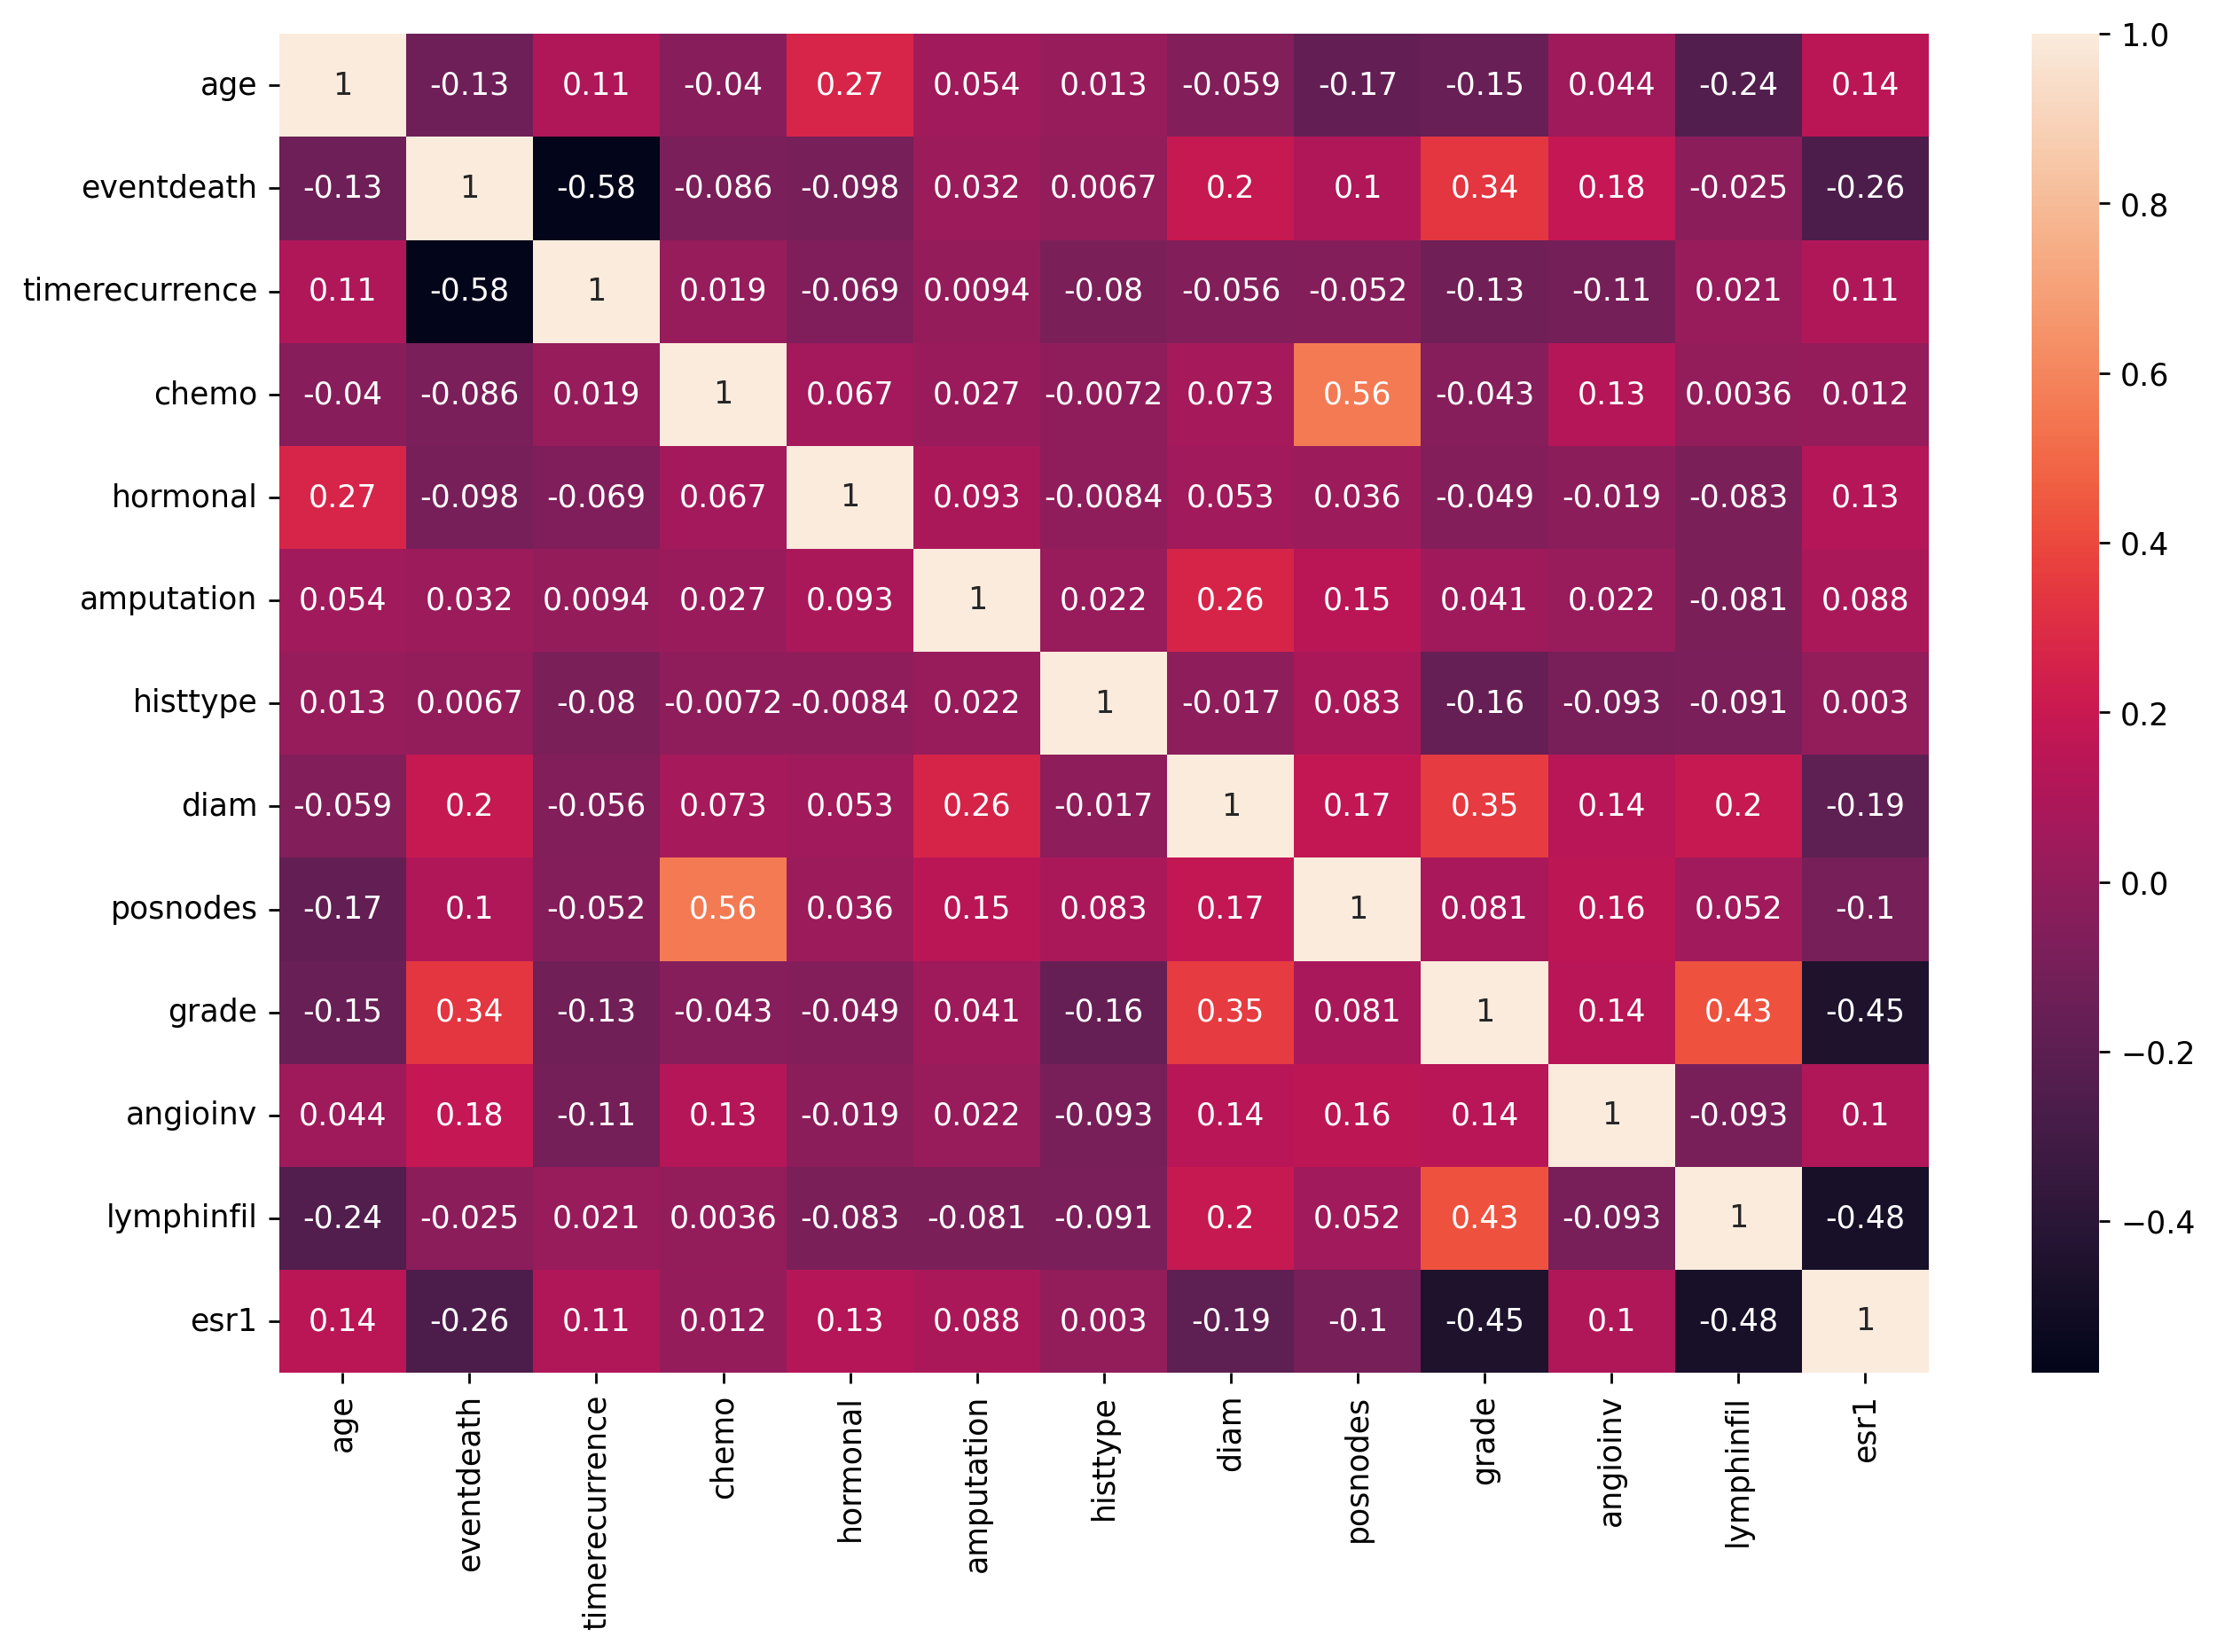

In [9]:
plt.figure(figsize=(12,8),dpi=250)

sns.heatmap(df.corr(),annot=True)

# Machine Learning

## Train | Test Split


In [10]:
X = df.drop(['Patient','eventdeath'],axis=1)

In [11]:
y = df['eventdeath']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)

In [17]:
scaled_X_test = scaler.transform(X_test)

## Logistic regression model & Gridsearch

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [19]:
log_model = LogisticRegression(max_iter=2000)

In [20]:
penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)

param_grid = dict(penalty=penalty,C=C)

In [21]:
grid_log_model = GridSearchCV(log_model,param_grid=param_grid)

In [22]:
grid_log_model.fit(scaled_X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [23]:
grid_log_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [24]:
grid_log_model.best_estimator_.coef_

array([[-0.31975087, -2.13911953, -0.59454042, -0.39008062, -0.2514695 ,
        -0.10082188,  0.45018648,  0.45995554,  0.68219569,  0.38226971,
        -0.71439795, -0.76199333]])

In [25]:
coefs = pd.Series(index=X.columns,data=grid_log_model.best_estimator_.coef_[0])

In [26]:
coefs = coefs.sort_values()

In [27]:
coefs.index

Index(['timerecurrence', 'esr1', 'lymphinfil', 'chemo', 'hormonal', 'age',
       'amputation', 'histtype', 'angioinv', 'diam', 'posnodes', 'grade'],
      dtype='object')

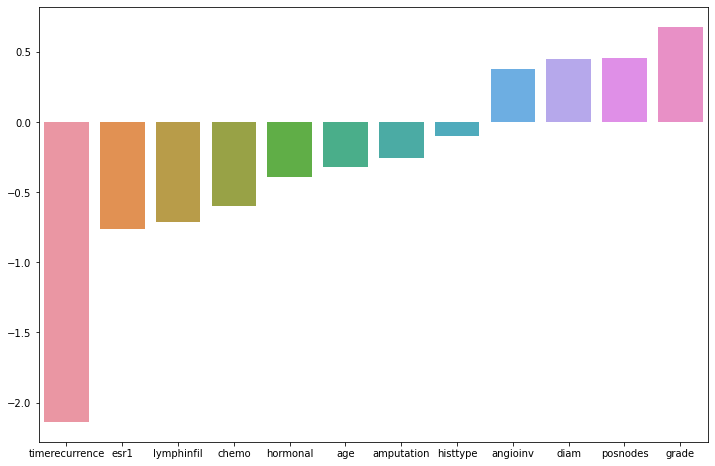

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x=coefs.index,y=coefs.values);

### Logistic Model Performance Evaluation

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

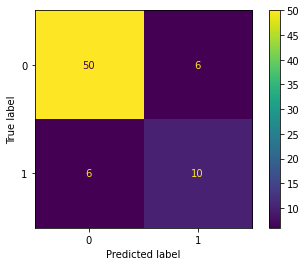

In [30]:
plot_confusion_matrix(grid_log_model,scaled_X_test,y_test)

In [33]:
y_preds = grid_log_model.predict(scaled_X_test)

In [34]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.62      0.62      0.62        16

    accuracy                           0.83        72
   macro avg       0.76      0.76      0.76        72
weighted avg       0.83      0.83      0.83        72



## Gradient Boosting and Grid Search with CV

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [37]:
gb_model = GradientBoostingClassifier()

In [38]:
grid_gb_model = GridSearchCV(gb_model, param_grid=param_grid)

In [39]:
grid_gb_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

### Gradient boost Model Performance Evaluation

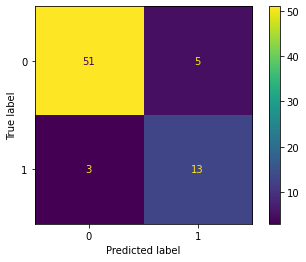

In [40]:
plot_confusion_matrix(grid_gb_model,scaled_X_test,y_test)

In [41]:
gb_preds = grid_gb_model.predict(scaled_X_test)

In [44]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.72      0.81      0.76        16

    accuracy                           0.89        72
   macro avg       0.83      0.86      0.85        72
weighted avg       0.90      0.89      0.89        72

